In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [5]:
#load in the data 
file = "one_hot_data.csv"
df = pd.read_csv(file)
df.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,Disease
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
#find the unique symptoms 
df.columns.values

array(['abdominal_pain', 'abnormal_menstruation', 'acidity',
       'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain',
       'belly_pain', 'blackheads', 'bladder_discomfort', 'blister',
       'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision',
       'breathlessness', 'brittle_nails', 'bruising',
       'burning_micturition', 'chest_pain', 'chills',
       'cold_hands_and_feets', 'coma', 'congestion', 'constipation',
       'continuous_feel_of_urine', 'continuous_sneezing', 'cough',
       'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea',
       'dischromic_patches', 'distention_of_abdomen', 'dizziness',
       'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger',
       'extra_marital_contacts', 'family_history', 'fast_heart_rate',
       'fatigue', 'fluid_overload', 'foul_smell_of_urine', 'headache',
       'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption',
       'increased_appetite', 'indigestion', 'infl

In [7]:
#create a list of the unique symptoms 
symptoms = ['abdominal_pain', 'abnormal_menstruation', 'acidity',
       'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain',
       'belly_pain', 'blackheads', 'bladder_discomfort', 'blister',
       'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision',
       'breathlessness', 'brittle_nails', 'bruising',
       'burning_micturition', 'chest_pain', 'chills',
       'cold_hands_and_feets', 'coma', 'congestion', 'constipation',
       'continuous_feel_of_urine', 'continuous_sneezing', 'cough',
       'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea',
       'dischromic_patches', 'distention_of_abdomen', 'dizziness',
       'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger',
       'extra_marital_contacts', 'family_history', 'fast_heart_rate',
       'fatigue', 'fluid_overload', 'foul_smell_of_urine', 'headache',
       'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption',
       'increased_appetite', 'indigestion', 'inflammatory_nails',
       'internal_itching', 'irregular_sugar_level', 'irritability',
       'irritation_in_anus', 'itching', 'joint_pain', 'knee_pain',
       'lack_of_concentration', 'lethargy', 'loss_of_appetite',
       'loss_of_balance', 'loss_of_smell', 'malaise', 'mild_fever',
       'mood_swings', 'movement_stiffness', 'mucoid_sputum',
       'muscle_pain', 'muscle_wasting', 'muscle_weakness', 'nausea',
       'neck_pain', 'nodal_skin_eruptions', 'obesity',
       'pain_behind_the_eyes', 'pain_during_bowel_movements',
       'pain_in_anal_region', 'painful_walking', 'palpitations',
       'passage_of_gases', 'patches_in_throat', 'phlegm', 'polyuria',
       'prominent_veins_on_calf', 'puffy_face_and_eyes',
       'pus_filled_pimples', 'receiving_blood_transfusion',
       'receiving_unsterile_injections', 'red_sore_around_nose',
       'red_spots_over_body', 'redness_of_eyes', 'restlessness',
       'runny_nose', 'rusty_sputum', 'scurring', 'shivering',
       'silver_like_dusting', 'sinus_pressure', 'skin_peeling',
       'skin_rash', 'slurred_speech', 'small_dents_in_nails',
       'spinning_movements', 'spotting_urination', 'stiff_neck',
       'stomach_bleeding', 'stomach_pain', 'sunken_eyes', 'sweating',
       'swelled_lymph_nodes', 'swelling_joints', 'swelling_of_stomach',
       'swollen_blood_vessels', 'swollen_extremeties', 'swollen_legs',
       'throat_irritation', 'toxic_look_(typhos)', 'ulcers_on_tongue',
       'unsteadiness', 'visual_disturbances', 'vomiting',
       'watering_from_eyes', 'weakness_in_limbs',
       'weakness_of_one_body_side', 'weight_gain', 'weight_loss',
       'yellow_crust_ooze', 'yellow_urine', 'yellowing_of_eyes',
       'yellowish_skin']

In [8]:
#find the unique diseases 
print(df["Disease"].unique())


['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [9]:
#create a list of the unique diseases 
disease = ['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction',
 'Peptic ulcer diseae', 'AIDS', 'Diabetes ', 'Gastroenteritis',
 'Bronchial Asthma', 'Hypertension ', 'Migraine', 'Cervical spondylosis',
 'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria', 'Chicken pox',
 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B', 'Hepatitis C',
 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis',
 'Common Cold', 'Pneumonia', 'Dimorphic hemmorhoids(piles)', 'Heart attack',
 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
 'Osteoarthristis', 'Arthritis', '(vertigo) Paroymsal  Positional Vertigo',
 'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo']

In [10]:
#label encode the disease column 

df = df.replace({'Fungal infection':0, 'Allergy':1, 'GERD':2, 'Chronic cholestasis':3, 'Drug Reaction':4,
 'Peptic ulcer diseae':5, 'AIDS':6, 'Diabetes ':7, 'Gastroenteritis':8,
 'Bronchial Asthma':9, 'Hypertension ':10, 'Migraine':11, 'Cervical spondylosis':12,
 'Paralysis (brain hemorrhage)':13, 'Jaundice':14, 'Malaria':15, 'Chicken pox':16,
 'Dengue':17, 'Typhoid':18, 'hepatitis A':19, 'Hepatitis B':20, 'Hepatitis C':21,
 'Hepatitis D':22, 'Hepatitis E':23, 'Alcoholic hepatitis':24, 'Tuberculosis':25,
 'Common Cold':26, 'Pneumonia':27, 'Dimorphic hemmorhoids(piles)':28, 'Heart attack':29,
 'Varicose veins':30, 'Hypothyroidism':31, 'Hyperthyroidism':32, 'Hypoglycemia':33,
 'Osteoarthristis':34, 'Arthritis':35, '(vertigo) Paroymsal  Positional Vertigo':36,
 'Acne':37, 'Urinary tract infection':38, 'Psoriasis':39, 'Impetigo':40})

In [11]:
X= df[symptoms]

y = df[["Disease"]]

y = np.ravel(y)

In [12]:
# Train test split using X_train, y_train dummies from above
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
#test the decision tree classifier 
clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 1.0


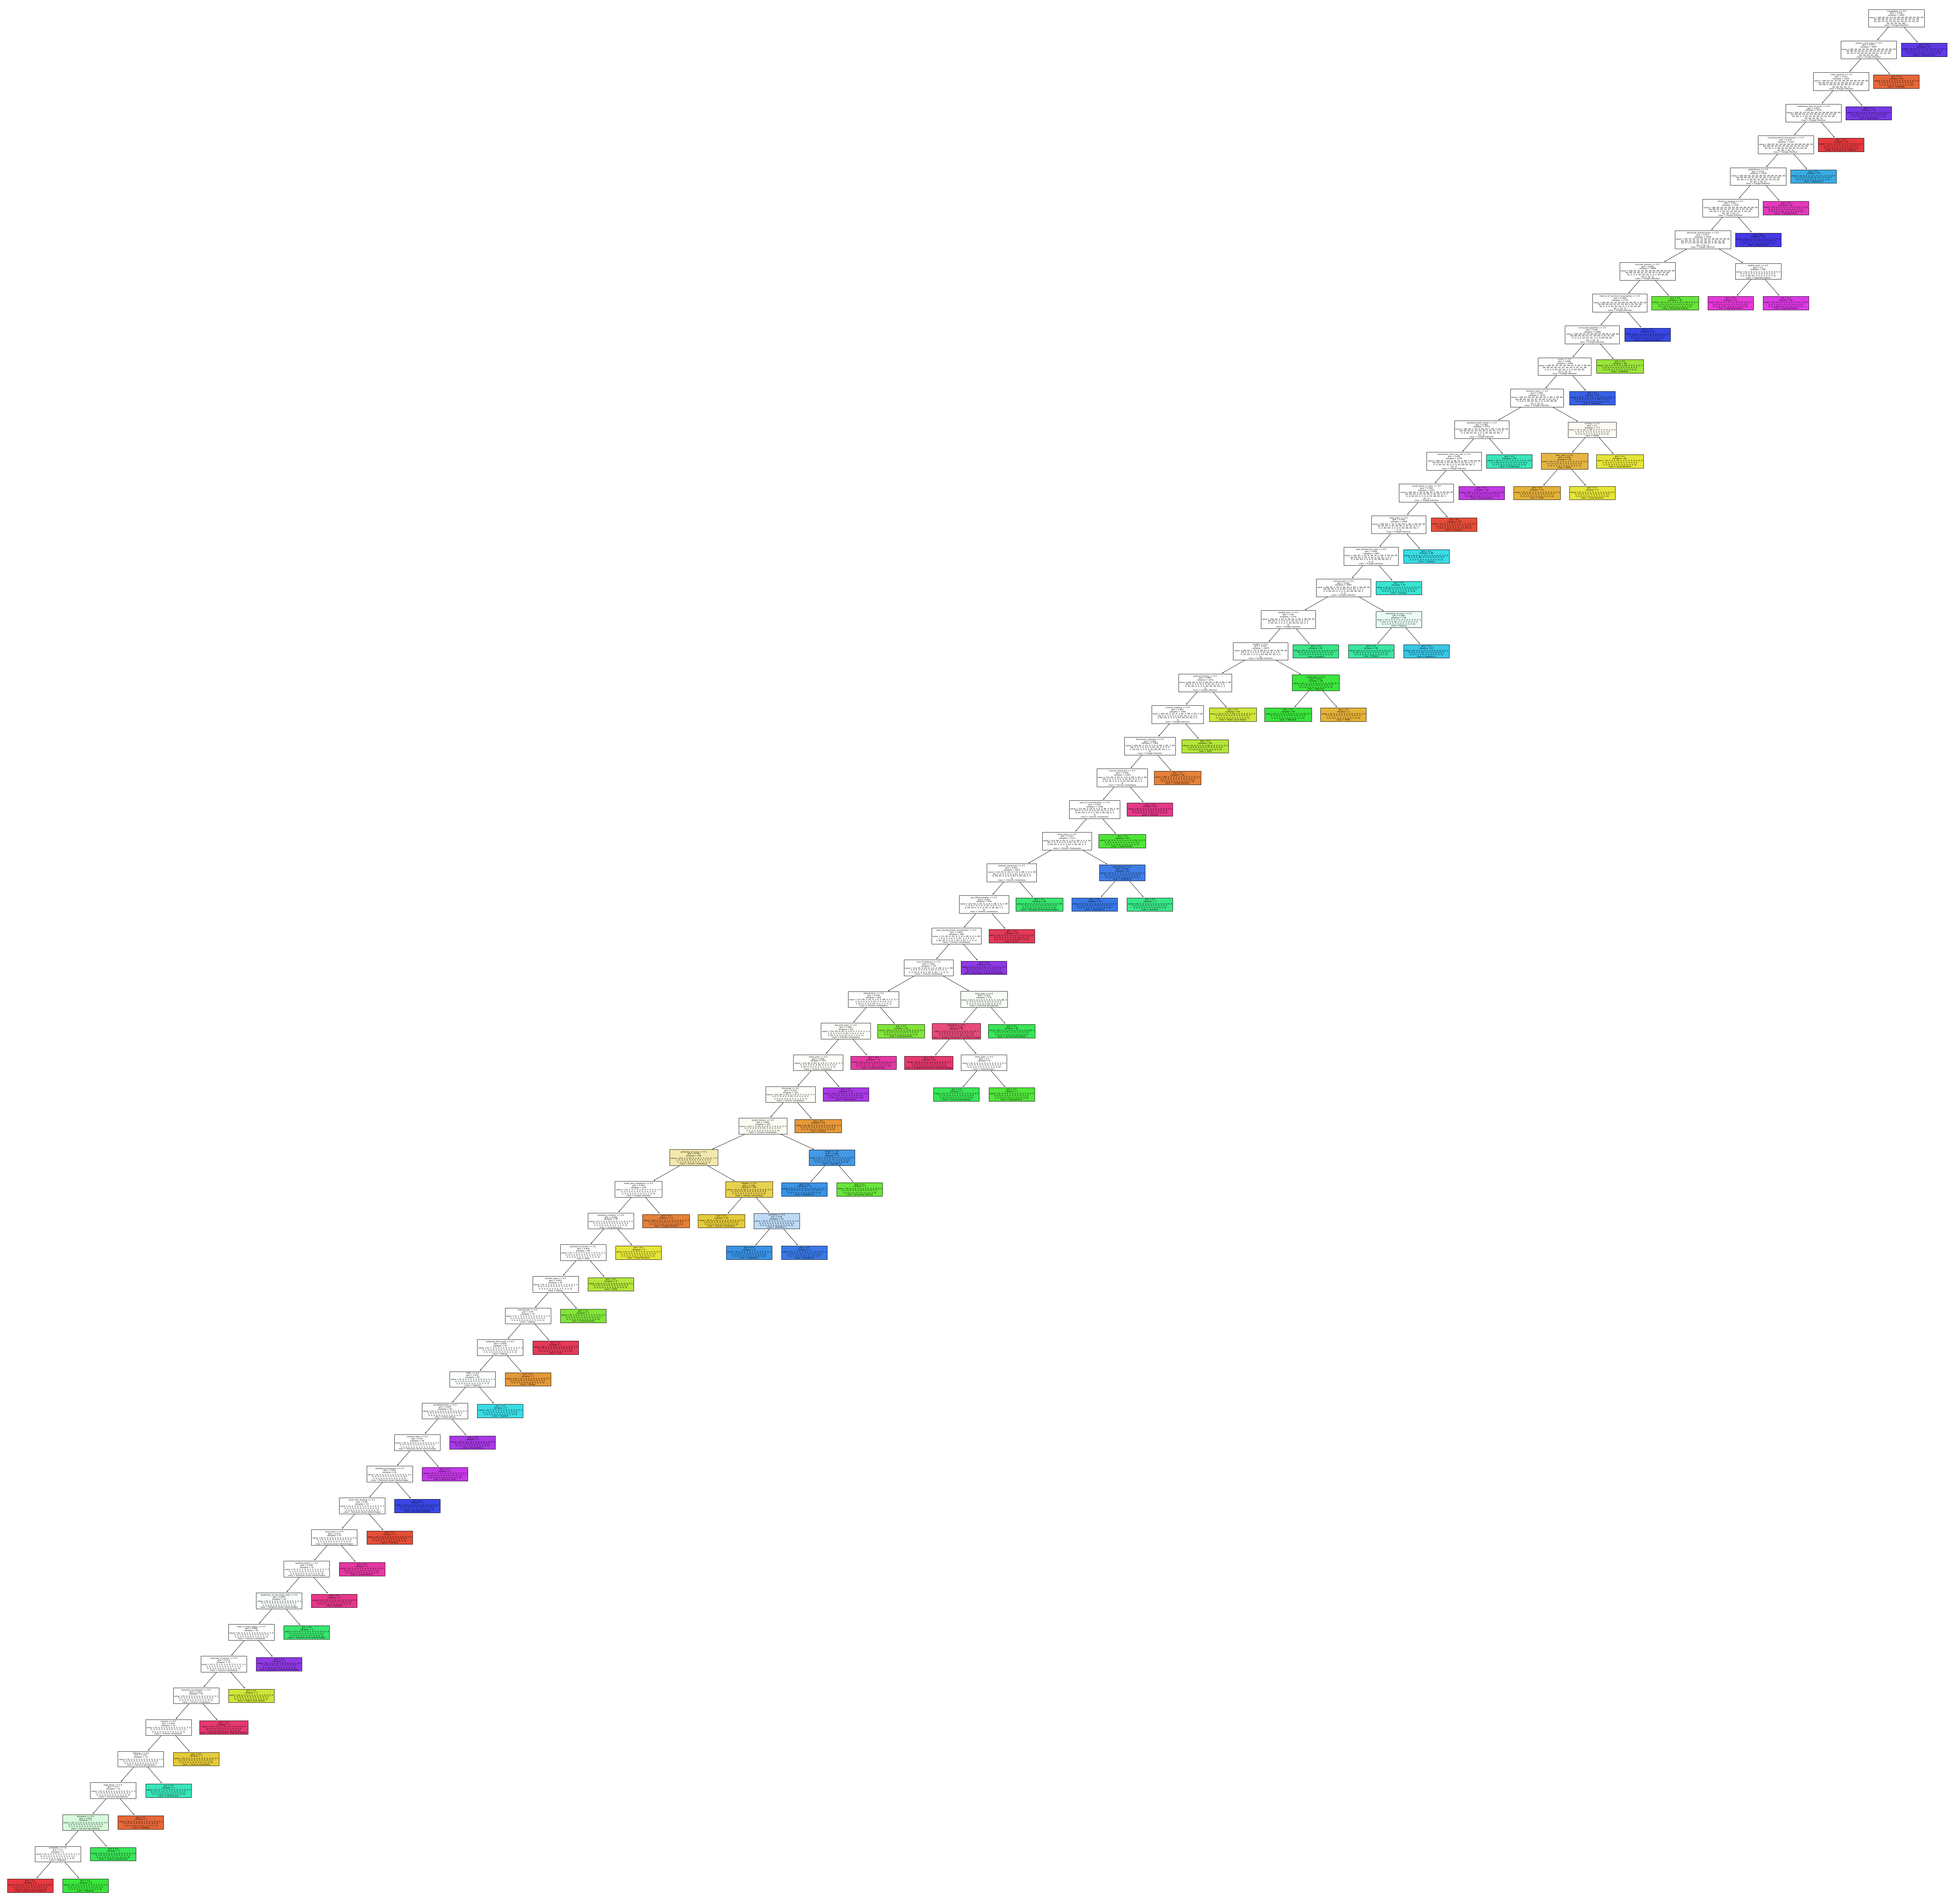

In [31]:
#visualize the decision tree and save to file 
#NOTE - google colab is not optimized for displaying this figure in-line. Please refer to the png download.

feature_names = df[symptoms].columns.tolist()
class_names = disease

fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

plt.savefig("decision-tree-viz.png", figsize=(400,500))  

In [ ]:
#test the random forest classifier 
forest = RandomForestClassifier(random_state=1, n_estimators=40).fit(X_train, y_train)
print(f'Training Score: {forest.score(X_train, y_train)}')
print(f'Testing Score: {forest.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 1.0


In [ ]:
forest_predict = forest.predict(X_test)

In [ ]:
print(f'accuracy_score: {round(accuracy_score(y_test, forest_predict),2)*100} %')


accuracy_score: 100.0 %


In [ ]:
def prediction(data):
    result=[]
    for i in range(0,len(symptoms)):
      result.append(0)
    for i in range(0,len(symptoms)):
        for k in data:
            if(k==symptoms[i]):
                result[i]=1
    labels = [result]
    predict = forest.predict(labels)
    predicted=predict[0]
    for a in range(0,len(disease)):
        if(predicted == a):
            done = 'yes'
            break
    if (done == 'yes'):
        print(disease[a])
    else:
        print("Sorry, your symptoms did not match any prognoses in our database. Please consult your physician.")

Below we test the validity of the predictor function by running different combinations of symptoms and ensuring that the output is consistent with what is expected. 

In [ ]:
data={"vomiting","sunken_eyes",'dehydration'}
prediction(data)

Gastroenteritis


In [ ]:
data = {'fatigue', 'cough', 'high_fever', 'mucoid_sputum'}
prediction(data)

Bronchial Asthma


In [ ]:
data = {'dizziness', 'loss_of_balance', 'lack_of_concentration'}
prediction(data)

Hypertension 


In [ ]:
 data = {'dischromic_patches','nodal_skin_eruptions', 'skin_rash'}
 prediction(data)

Fungal infection


In [ ]:
data = {'stomach_pain','acidity', 'ulcers_on_tongue'}
prediction(data)

GERD


In [ ]:
data = {'itching','vomiting', 'yellowish_skin','nausea', 'abdominal_pain','yellowing_of_eyes'}
prediction(data)

Chronic cholestasis


In [ ]:
data = {'itching','skin_rash', 'burning_micturition','spotting_ urination', 'burning_micturition'}
prediction(data)

Drug Reaction


In [ ]:
data = {"breathlessness", "dizziness", "fatigue"}
prediction(data)

Heart attack


In [ ]:
data = {"joint_pain"}
prediction(data)

Osteoarthristis


In [ ]:
data = {"back_pain", "weakness_in_limbs", "neck_pain", "dizziness", "loss_of_balance"}
prediction(data)

Cervical spondylosis


Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
classifier = forest
y_true = y_test
y_pred = classifier.predict(X_test)

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        31
           8       1.00      1.00      1.00        32
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        32
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00        29
          17       1.00    